In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#This is the cleaned data obtained.
df= pd.read_csv("/Users/saipraneeth/Documents/JOB/Merged Data.csv")

In [3]:
df.head()

,DATE,CLOUD_BASE_HEIGHT_24HR_DEP,CLOUD_BASE_HEIGHT_AVG,CLOUD_BASE_HEIGHT_MAX,CLOUD_BASE_HEIGHT_MIN,CLOUD_COVER_24HR_DEP,CLOUD_COVER_AVG,CLOUD_COVER_MAX,CLOUD_COVER_MIN,CLOUD_COVER_PERC_24HR_DEP,...,WIND_GUST_MIN,WIND_GUST_INSTANTANEOUS_24HR_DEP,WIND_GUST_INSTANTANEOUS_AVG,WIND_GUST_INSTANTANEOUS_MAX,WIND_GUST_INSTANTANEOUS_MIN,WIND_SPEED_24HR_DEP,WIND_SPEED_AVG,WIND_SPEED_MAX,WIND_SPEED_MIN,ESTIMATED_VISITS
0,2021-04-01,-438,1552.0,2709.0,726.0,-0.64,0.30,0.94,0.0,-63,...,9.79,4.26,12.22,15.40,9.77,2.65,7.59,9.26,6.05,3781
1,2021-04-02,10639,NaN,NaN,NaN,-0.30,0.00,0.00,0.0,-29,...,5.53,-2.64,9.57,11.55,4.69,-1.72,5.87,7.64,3.40,4024
2,2021-04-03,-8806,3385.0,5141.0,1709.0,0.53,0.53,1.00,0.0,53,...,3.04,-3.34,6.24,11.06,2.01,-1.85,4.02,6.77,1.28,3189
3,2021-04-04,4162,7547.0,7714.0,7380.0,-0.48,0.05,0.60,0.0,-48,...,2.38,-2.18,4.05,5.46,2.14,-2.05,1.97,3.61,0.24,5407
4,2021-04-05,-3140,4407.0,5151.0,3748.0,0.41,0.46,0.99,0.0,41,...,2.91,0.05,4.10,6.40,2.77,0.34,2.31,4.28,0.65,2519


Text(0.5, 1.0, 'UV Index')

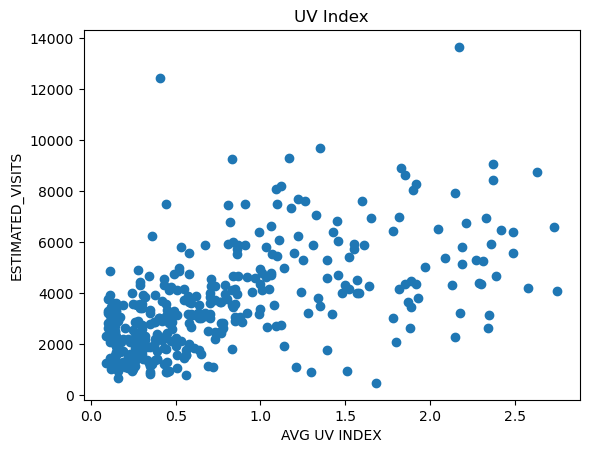

In [4]:
plt.scatter(df['INDEX_UV_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('AVG UV INDEX')
plt.ylabel('ESTIMATED_VISITS')
plt.title('UV Index')

The above scatter plot gives us information about the avg range of uv index that we could use to interpret

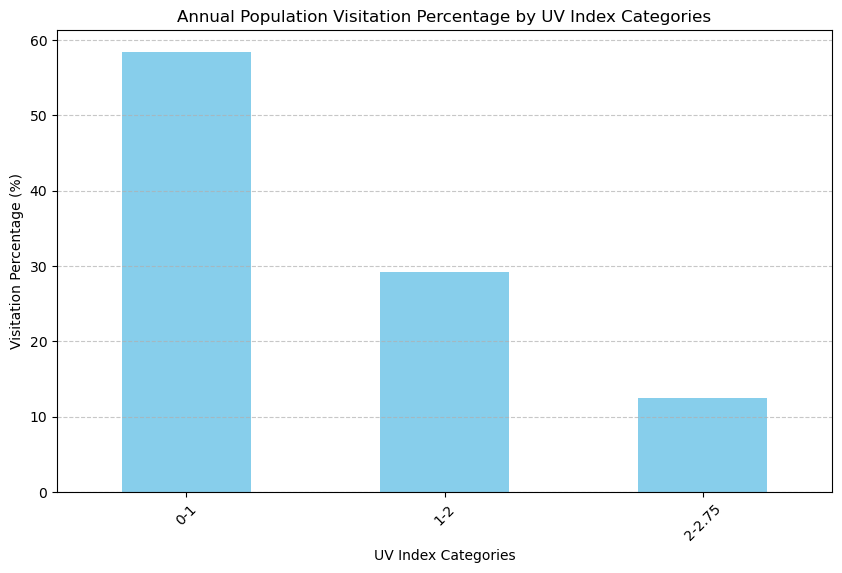

In [5]:
ranges = pd.cut(df['INDEX_UV_AVG'],bins=[0, 1, 2, 2.75], labels=['0-1', '1-2', '2-2.75'])
visits_uv = df.groupby(ranges)['ESTIMATED_VISITS'].sum()
total_visits = visits_uv.sum()
visitation_perc_uv = (visits_uv / total_visits) * 100

plt.figure(figsize=(10, 6))
visitation_perc_uv.plot(kind='bar', color='skyblue')
plt.title('Annual Population Visitation Percentage by UV Index Categories')
plt.xlabel('UV Index Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 #### Insights - 

- It appears that a significant majority of visitors, around 80%, tend to visit the park when the UV index falls below 2. 

- Notably, a substantial portion of this majority is observed when the UV index is in the range of 0-1. 

- To boost visits on days with higher UV indexes, one strategy could involve offering complimentary sunscreen to visitors. 

- Another approach could be extending operational hours beyond the usual, potentially attracting more people during the cooler evenings.

Text(0.5, 1.0, 'Visbility vs Estimated Visits')

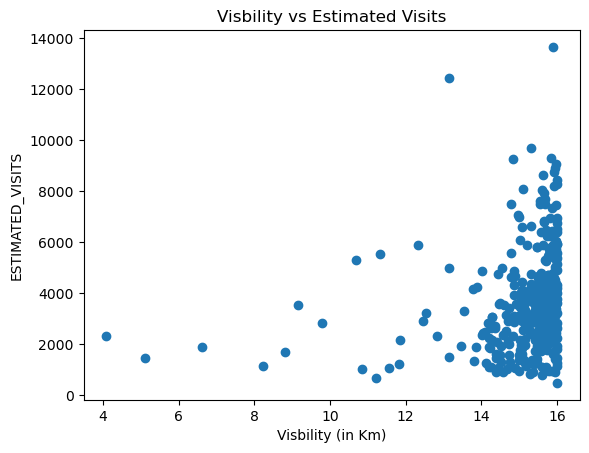

In [6]:
plt.scatter(df['VISIBILITY_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('Visbility (in Km)')
plt.ylabel('ESTIMATED_VISITS')
plt.title('Visbility vs Estimated Visits')

The visibility data ranges approximately 4 to 16 kilometers, with a predominant concentration between 15 to 16 kilometers, suggesting consistently favorable visibility conditions

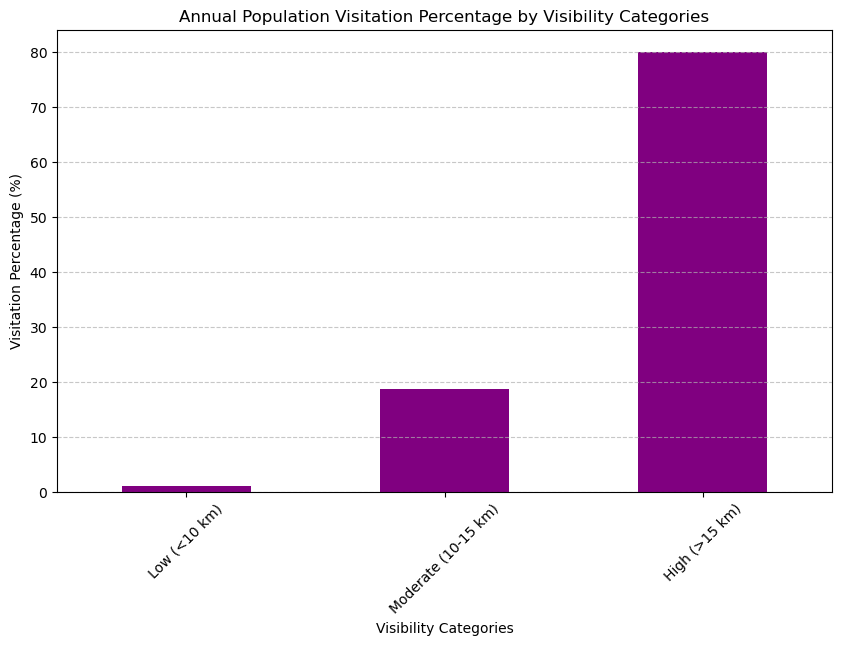

In [7]:
visibility_ranges = pd.cut(df['VISIBILITY_AVG'], bins=[0, 10, 15, 16], labels=['Low (<10 km)', 'Moderate (10-15 km)', 'High (>15 km)'])
visits_vis = df.groupby(visibility_ranges)['ESTIMATED_VISITS'].sum()
total_visits = visits_vis.sum()
visitation_perc_vis = (visits_vis / total_visits) * 100


plt.figure(figsize=(10, 6))
visitation_perc_vis.plot(kind='bar', color='purple')
plt.title('Annual Population Visitation Percentage by Visibility Categories')
plt.xlabel('Visibility Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Insgihts -

- The vast majority of visitors choose to visit the park on days characterized by high visibility or clear conditions.

- To enhance visitation rates on days with lower visibility, one could implement targeted marketing strategies. This might involve emphasizing indoor activities or offering enticing promotions specifically tailored for such days. 
- By recognizing that approximately 80% of visitors prefer high visibility conditions, it's essential to optimize efforts to attract the remaining 20% by providing appealing alternatives during periods of reduced visibility.

Text(0.5, 1.0, 'WIND GUST vs Estimated Visits')

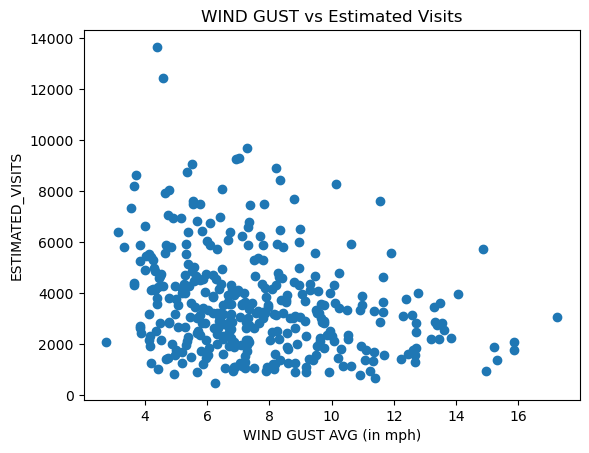

In [8]:
plt.scatter(df['WIND_GUST_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('WIND GUST AVG (in mph)')
plt.ylabel('ESTIMATED_VISITS')
plt.title('WIND GUST vs Estimated Visits')

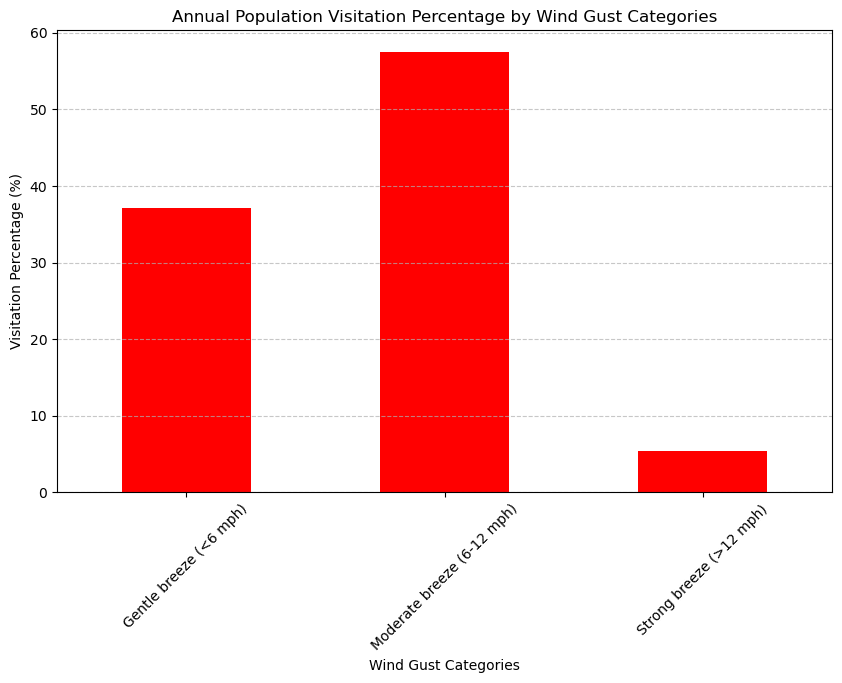

In [9]:
gust_ranges = pd.cut(df['WIND_GUST_AVG'], bins=[0, 6, 12, 17], labels=['Gentle breeze (<6 mph)', 'Moderate breeze (6-12 mph)', 'Strong breeze (>12 mph)'])
visits_gust = df.groupby(gust_ranges)['ESTIMATED_VISITS'].sum()
total_visits = visits_gust.sum()
visitation_perc_gust = (visits_gust / total_visits) * 100

plt.figure(figsize=(10, 6))
visitation_perc_gust.plot(kind='bar', color='red')
plt.title('Annual Population Visitation Percentage by Wind Gust Categories')
plt.xlabel('Wind Gust Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights - 
- It's apparent that the visitors finds Gentle to Moderate Breeze conditions acceptable for park visits. 
- However, the decline in visitation rates during stronger winds implies that higher wind gusts may deter visitors, especially those engaging in activities sensitive to wind conditions.

- To entice the remaining percent visitors to visit on windy days, one could offer special discounts or promotions for activities that can still be enjoyed despite the wind, such as guided nature walks or outdoor photography sessions with wind-resistant equipment.

Text(0.5, 1.0, 'Snow to liquid Ratio according to Accuweather data vs Estimated Visits')

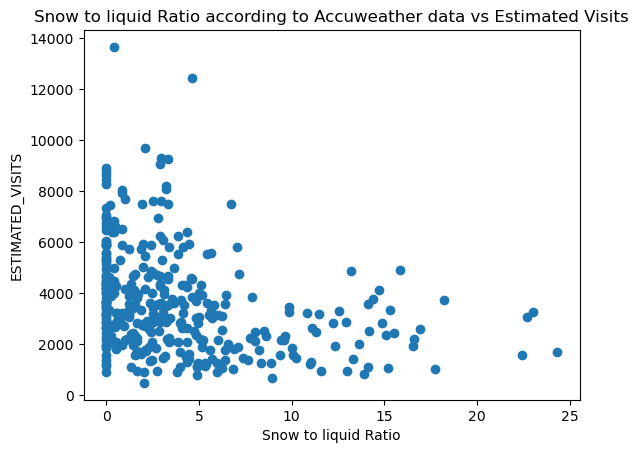

In [10]:
plt.scatter(df['SNOW_LIQUID_RATIO_ACCUWEATHER_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('Snow to liquid Ratio')
plt.ylabel('ESTIMATED_VISITS')
plt.title('Snow to liquid Ratio according to Accuweather data vs Estimated Visits')

From the scatter plot we can interpret that most of the visitation is when the snow to liquid is very less. Let's look at the bar graph with categories of snow to liquid ratios.

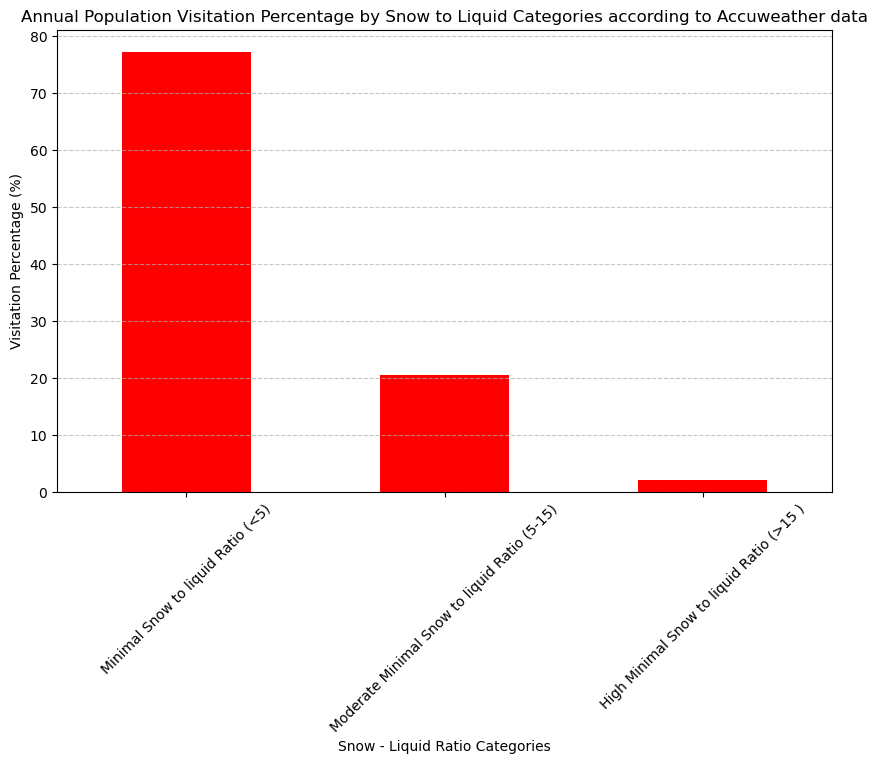

In [11]:
SLR_ranges = pd.cut(df['SNOW_LIQUID_RATIO_ACCUWEATHER_AVG'], bins=[0, 5, 15, 17], labels=['Minimal Snow to liquid Ratio (<5)', 'Moderate Minimal Snow to liquid Ratio (5-15)', 'High Minimal Snow to liquid Ratio (>15 )'])
visits_SLR = df.groupby(SLR_ranges)['ESTIMATED_VISITS'].sum()
total_visits = visits_SLR.sum()
visitation_perc_SLR = (visits_SLR / total_visits) * 100

plt.figure(figsize=(10, 6))
visitation_perc_SLR.plot(kind='bar', color='red')
plt.title('Annual Population Visitation Percentage by Snow to Liquid Categories according to Accuweather data')
plt.xlabel('Snow - Liquid Ratio Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights -
- It is evident from the graph that visitors tend to favor days with minimal snow or lower rates of snow converting to liquid.

- To capitalize on periods with a high snow-to-liquid ratio, promoting activities like indoor activities  campfires could significantly influence more visitors to come.

Text(0.5, 1.0, 'Visitation Percentage by Relative Humidity')

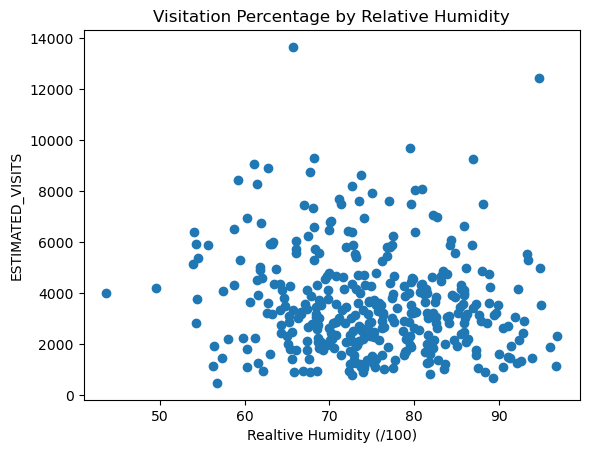

In [12]:
plt.scatter(df['HUMIDITY_RELATIVE_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('Realtive Humidity (/100)')
plt.ylabel('ESTIMATED_VISITS')
plt.title('Visitation Percentage by Relative Humidity')

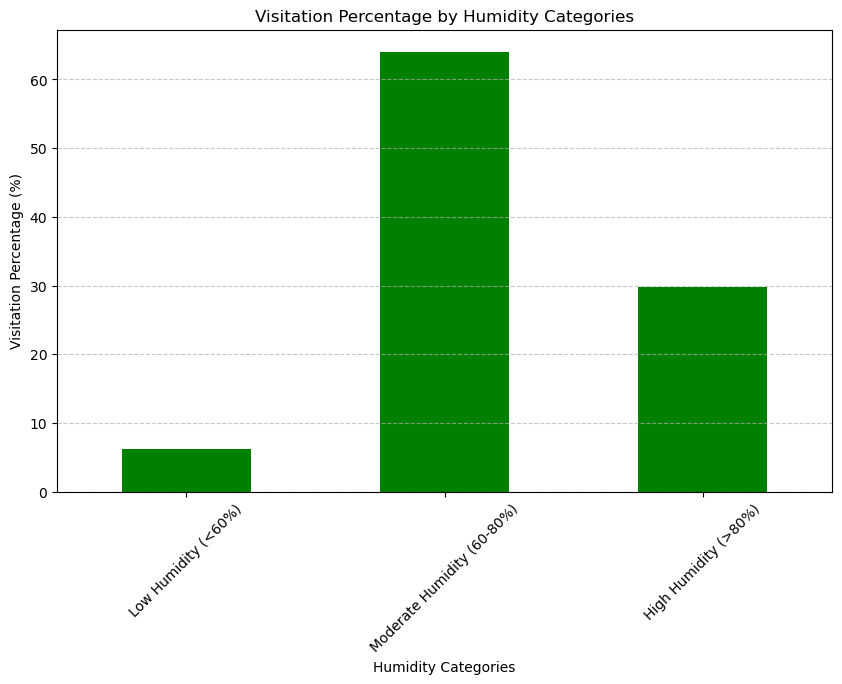

In [13]:
hum_ranges = pd.cut(df['HUMIDITY_RELATIVE_AVG'], bins=[0, 60, 80, 100],
                         labels=['Low Humidity (<60%)', 'Moderate Humidity (60-80%)', 'High Humidity (>80%)'])
visits_hum = df.groupby(hum_ranges)['ESTIMATED_VISITS'].sum()
total_visits_hum = visits_hum.sum()
visitation_perc_hum = (visits_hum / total_visits_hum) * 100

plt.figure(figsize=(10, 6))
visitation_perc_hum.plot(kind='bar', color='green')
plt.title('Visitation Percentage by Humidity Categories')
plt.xlabel('Humidity Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights - 
- The data strongly indicates that 94% of visitors tend to favor moderate to high humidity conditions, potentially due to their positive correlation with increased visibility.
- To attract a more diverse range of visitors across varying weather conditions, providing amenities like misting stations or shaded areas to mitigate discomfort associated with low humidity for visitors who still choose to explore the park during these conditions.

Text(0.5, 1.0, 'Visitation Percentage by Degree Days')

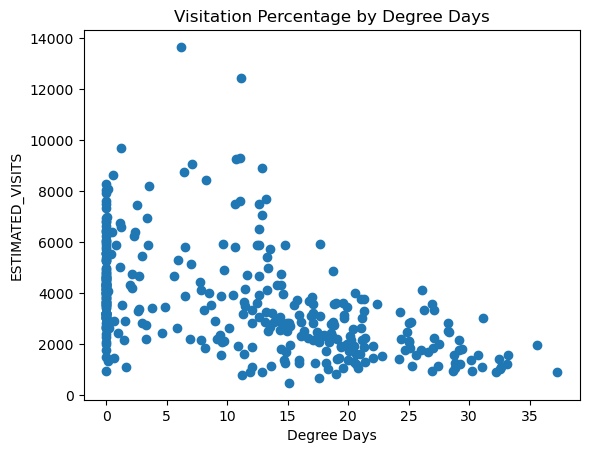

In [14]:
plt.scatter(df['DEGREE_DAYS_EFFECTIVE'],df['ESTIMATED_VISITS'])
plt.xlabel('Degree Days')
plt.ylabel('ESTIMATED_VISITS')
plt.title('Visitation Percentage by Degree Days')

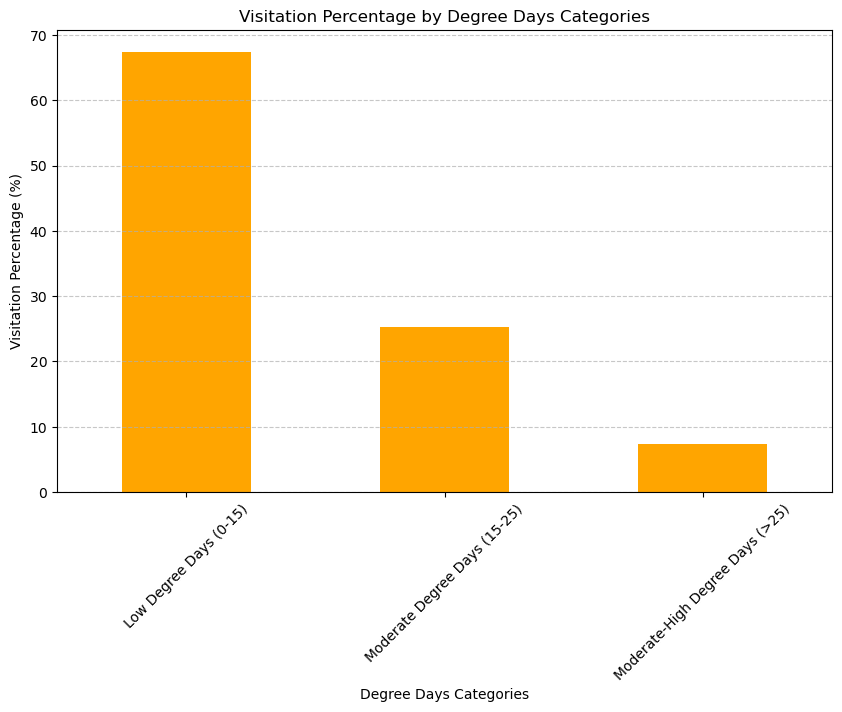

In [15]:
degree_ranges = pd.cut(df['DEGREE_DAYS_EFFECTIVE'], bins=[0, 15, 25, 30],
                            labels=['Low Degree Days (0-15)', 'Moderate Degree Days (15-25)',
                                    'Moderate-High Degree Days (>25)'])
visits_degree = df.groupby(degree_ranges)['ESTIMATED_VISITS'].sum()
total_visits_degree = visits_degree.sum()
visitation_perc_degree = (visits_degree / total_visits_degree) * 100
plt.figure(figsize=(10, 6))
visitation_perc_degree.plot(kind='bar', color='orange')
plt.title('Visitation Percentage by Degree Days Categories')
plt.xlabel('Degree Days Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights - 

- It's evident that approximately 70% of visitors favor cooler temperatures, with fewer people visiting when conditions are hotter.
- To attract more visitors, enhancing support for these temperature preferences could be beneficial. For instance, providing cooling or heating units indoors according to the prevailing conditions could create a more comfortable environment for visitors.
- Moreover, considering the installation of sprinkler systems might further enhance visitor experience, especially during warmer days, by providing a refreshing and enjoyable outdoor environment.

Text(0.5, 1.0, 'Visitation Percentage by Cloud Cover')

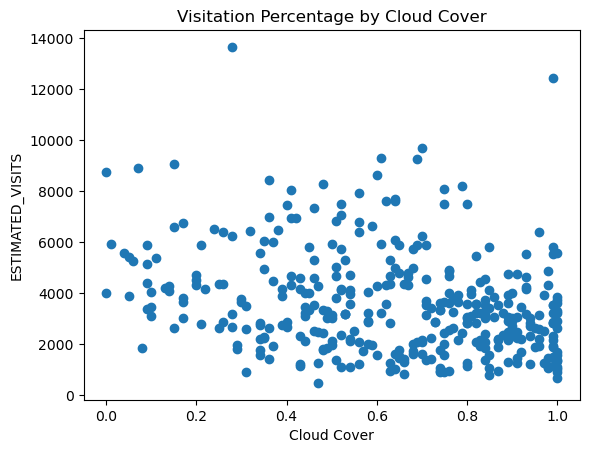

In [16]:
plt.scatter(df['CLOUD_COVER_AVG'],df['ESTIMATED_VISITS'])
plt.xlabel('Cloud Cover')
plt.ylabel('ESTIMATED_VISITS')
plt.title('Visitation Percentage by Cloud Cover')

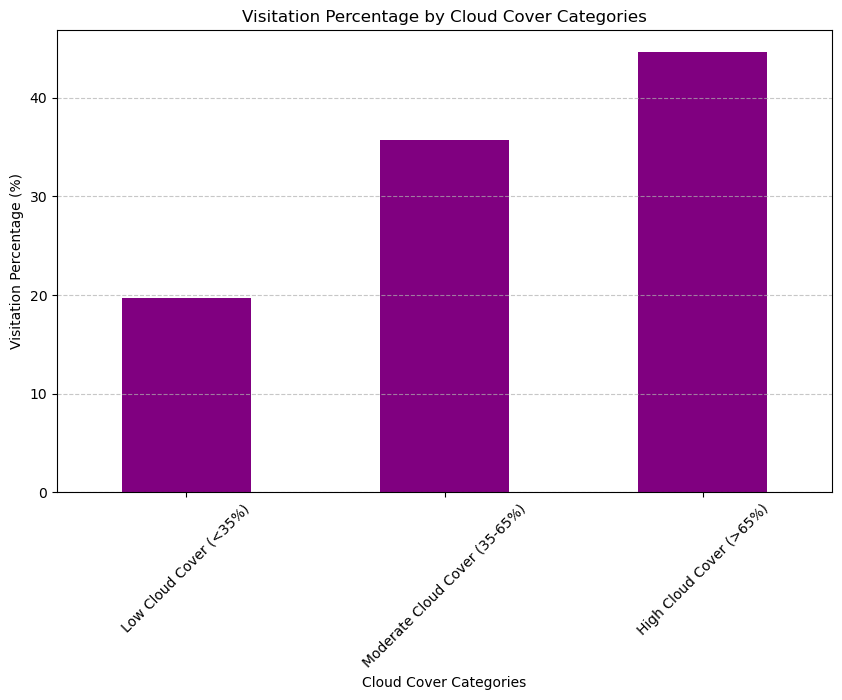

In [17]:
cc_ranges = pd.cut(df['CLOUD_COVER_AVG'], bins=[0, 0.35, 0.65, 1],
                            labels=['Low Cloud Cover (<35%)', 'Moderate Cloud Cover (35-65%)', 'High Cloud Cover (>65%)'])
visits_cc = df.groupby(cc_ranges)['ESTIMATED_VISITS'].sum()
total_visits_cc = visits_cc.sum()
visitation_per_cc = (visits_cc / total_visits_cc) * 100

plt.figure(figsize=(10, 6))
visitation_per_cc.plot(kind='bar', color='purple')
plt.title('Visitation Percentage by Cloud Cover Categories')
plt.xlabel('Cloud Cover Categories')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights - 
- It's interesting to note that the highest visitation occurs when there is moderate to high cloud cover. This indicates that visitors may have a preference for cooler temperatures or gentler sunlight.

- Considering this insight, planning activities that are not dependent on sunny weather could yield greater benefits. Offering amenities such as sunshades, rental umbrellas, or sunscreen stations could attract visitors even on days with clear skies, enhancing their overall experience at the park.

Below we make the following assumption for the months of the season:  
 
 Jan (-5.7 C), Feb(-3.5 C), Dec(2.7 C): Winter,
 
 Mar(0.527 C), Apr(5.5 C), May (11.59 C): Spring,
 
 June(19.44 C), July(21.06 C), Aug (23.48 C): Summer,
 
 Sep(19.03 C), Oct(14.7 C), Nov(5.744 C): Autumn
 
The temperature referenced represents the monthly average derived from the "TEMPERATURE_AVG" column in Microsoft Excel.

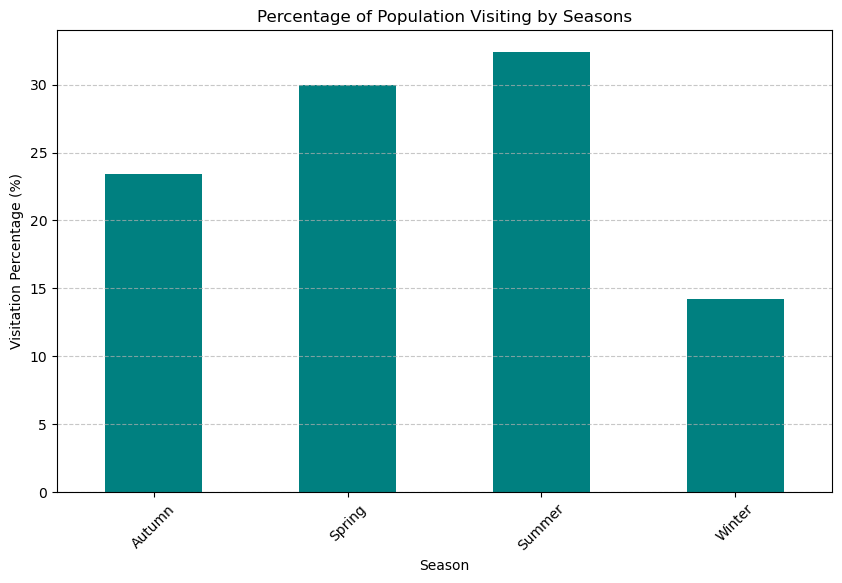

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
seasons = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['SEASON'] = df['MONTH'].map(seasons)
seasonal_visits_sum = df.groupby('SEASON')['ESTIMATED_VISITS'].sum()
total_visits = seasonal_visits_sum.sum()
seasonal_visitation_percentage = (seasonal_visits_sum / total_visits) * 100
plt.figure(figsize=(10, 6))
seasonal_visitation_percentage.plot(kind='bar', color='teal')
plt.title('Percentage of Population Visiting by Seasons')
plt.xlabel('Season')
plt.ylabel('Visitation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Insights - 
- The majority of visits occur during the spring and summer seasons, with significantly fewer visits during winter.

- To boost visitation during winter and autumn, promoting seasonal offers or early bird bookings could be effective strategies. 
- Additionally, incorporating winter attractions such as ice rinks, winter sports facilities, or holiday-themed events could attract more visitors during these colder months.